# Aula6_correlacoes_pearson_e_spearman

Ambos os testes são voltados para análise de correlações de variáveis quantitativas. Pearson é utilizado para variáveis quantitativas contínuas caso demonstrem normalidade; Spearman para variáveis quantitativas contínuas, discretas e ordinais (quando condificadas como quantitativas que “rankeiam” ou com atenção somente à direção monotônica).

A diferença fundamental: Pearson é paramétrico, Spearman, não. Isso implica em maior usabilidade de Pearson sobre Spearman (em desdobramentos de demais testes, como por exemplo para o diagnóstico de correlação entre variáveis independentes que estarão presentes em um modelo de regressão).

Pearson dá uso para média e desvio padrão/variância, e Spearman não (a finalidade é o uso do rankeamento).

Por ser paramétrica (e ter todas as suas vantagens), Pearson necessita de teste de normalidade; Spearman, não.

### 1. Estruturas dos testes de hipótese e análise de correlações

H0: 

Não há correlação entre as variâncias de x e de y;


H1:  

Há correlação entre as variâncias de x e de y.

r: coeficiente de determinação r² + coeficiente de não-determinação k² (basicamente, raiz quadrada de r².
Por isso, recomenda-se r > 0.4 (proveniente de um coeficiente de determinação r² > 0.16). 

r mede a força e a direção de uma relação LINEAR entre duas variáveis (de -1, se a correlação é negativa, à 1, se positiva);
rs mede a força e a direção MONOTÔNICA de dados postos em classificação/rankeados.
                                                                        
                                                                        


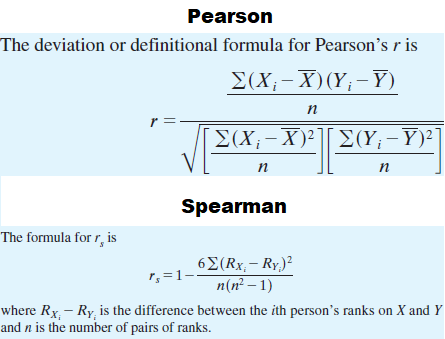

[1] "Fonte: Kirk 2008"


In [1]:
library("IRdisplay")
display_png(file="Aula6_Pearson_Spearman.png")
print('Fonte: Kirk 2008')

### 2. Teste de Correlação de Pearson

Análise de correlação entre 1) o percentual de votação de candidatos à presidência e 2) o coeficiente de variação (cv) calculado na comparação da votação de cada candidato entre os estados da federação (corte para compor o banco de dados: candidatos mais votados que se enquadram no quantitativo do número efetivo de candidatos por eleição, somando 36 casos).  

In [2]:
# Primeiro, carregar banco 

library(tidyverse)
dforig <- read_csv("Aula6_correlacao_cv_percentual_votos.csv")
dforig



Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Parsed with column specification:
cols(
  Candidato = col_character(),
  Ano = col_integer(),
  Coeficiente_de_variacao = col_double(),
  Percentual_de_votos = col_double()
)


Candidato,Ano,Coeficiente_de_variacao,Percentual_de_votos
Yedo Fiúza (PCB),1945,0.81,9.71
Eduardo Gomes (UDN),1945,0.38,34.74
Eurico Gaspar Dutra (PSD/PTB),1945,0.28,55.38
Cristiano Machado (PSD/PR/POT/PST),1950,0.67,21.48
Eduardo Gomes (UDN),1950,0.46,29.66
Getúlio Vargas (PTB/PSP),1950,0.32,48.74
Adhemar de Barros (PSP),1955,0.64,25.77
Juarez Távora (UDN/PDC/PL/PSB),1955,0.48,30.27
Jucelino Kubtischek (PSD/PTB/PR/PTN/PST/PRT),1955,0.32,35.68
Adhemar de Barros (PSP),1960,0.78,19.56


numeric(0)

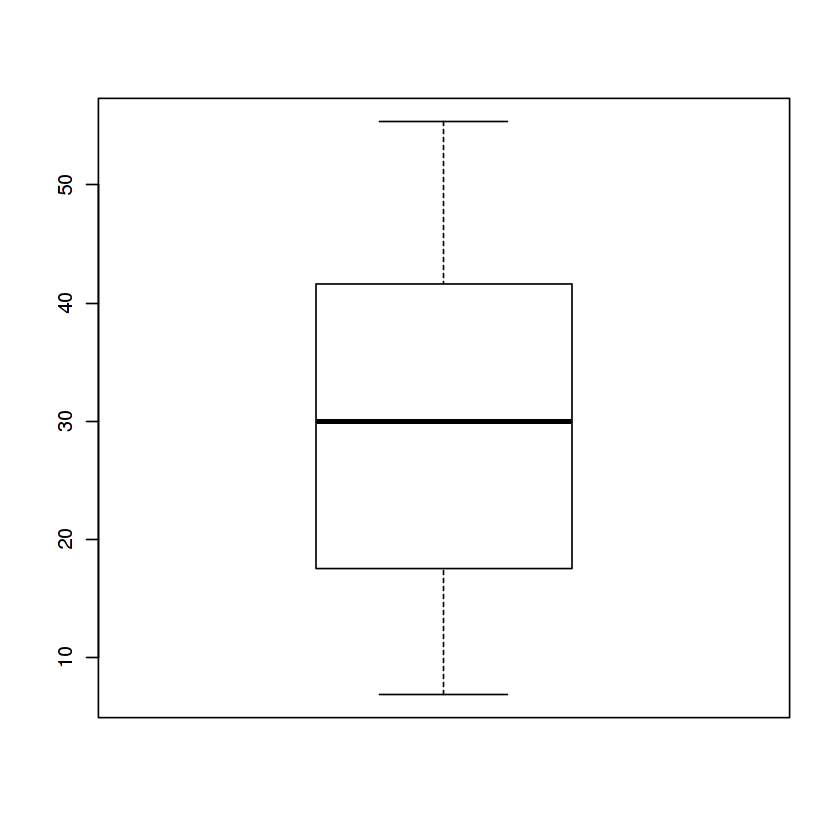

[1] 0.81 0.78 0.85 1.11

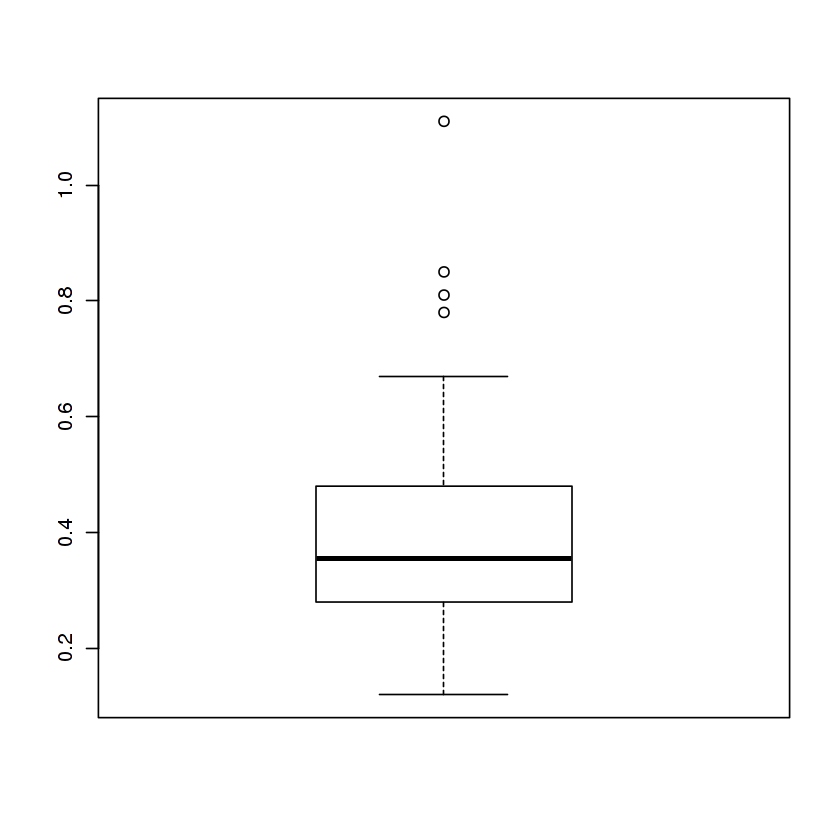

In [3]:
# antes de fazer as análises: diagnóstico para analisar os dados (encontrando os outliers) de x e y:

outliers1 <- boxplot(dforig$Percentual_de_votos)$out #boxplot 1
outliers1

outliers2 <- boxplot(dforig$Coeficiente_de_variacao)$out #boxplot 2
outliers2



In [4]:
# remoção de outliers acima observados:

dfpers <- dforig[!(dforig$Coeficiente_de_variacao %in% outliers2), ]
dfpers

Candidato,Ano,Coeficiente_de_variacao,Percentual_de_votos
Eduardo Gomes (UDN),1945,0.38,34.74
Eurico Gaspar Dutra (PSD/PTB),1945,0.28,55.38
Cristiano Machado (PSD/PR/POT/PST),1950,0.67,21.48
Eduardo Gomes (UDN),1950,0.46,29.66
Getúlio Vargas (PTB/PSP),1950,0.32,48.74
Adhemar de Barros (PSP),1955,0.64,25.77
Juarez Távora (UDN/PDC/PL/PSB),1955,0.48,30.27
Jucelino Kubtischek (PSD/PTB/PR/PTN/PST/PRT),1955,0.32,35.68
Henrique Teixeira Lott (PSD/PTB/PST/PSB/PRT),1960,0.24,32.93
Jânio Quadros (PTN/UDN/PR/PL/PDC),1960,0.17,48.27



	Pearson's product-moment correlation

data:  dfpers$Coeficiente_de_variacao and dfpers$Percentual_de_votos
t = -4.2382, df = 30, p-value = 0.0001976
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7917224 -0.3347056
sample estimates:
      cor 
-0.611976 


[1] -0.3745146

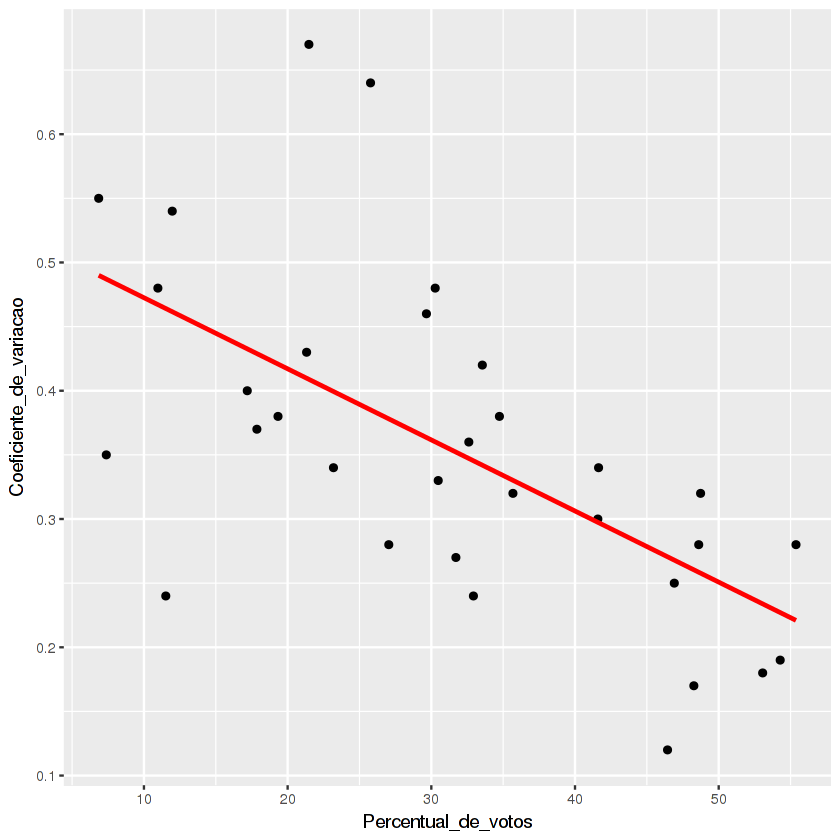

In [6]:

analpears <- cor.test(dfpers$Coeficiente_de_variacao, dfpers$Percentual_de_votos,  method="pearson")
analpears


ggplot(dfpers, aes(x=Percentual_de_votos, y=Coeficiente_de_variacao)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=FALSE)

-0.611976^2

### 3. Teste de Correlação de Spearman

Análise de correlação entre as escalas de opinião pública do ESEB 2018 (2237 casos excluídos os NA/MISS). 


Dois exemplos:  

1) nível de escolaridade  [D3_ESCOLA, 0 analfabeto à 9 pós-graduação ou mais] e satisfação com a democracia [Q21. De uma maneira geral, o(a) sr(a) está muito satisfeito(a), satisfeito(a), pouco satisfeito(a) ou nada satisfeito(a) com o funcionamento da democracia no Brasil?, 1 satisfeito à 5 nada satisfeito];  


2) "conservadorismo" [Q501:  "As minorias deveriam se adaptar aos costumes e tradições do Brasil", 1 concorda muito à 5 discorda muito] e confiança nas forças armadas [P309 "De maneira geral, como o(a) sr(a) avalia a atuação: Dos Militares, Forças Armadas", 1 ótima à 6 péssima].

In [37]:
library(haven)

dfspss <- read_sav("Aula6_Banco_de_dados_ESEB_2018.sav")

dfspear <- filter(dfspss, Q501 !=7 & Q501 !=8 & P309 !=8 & P309 !=9 & Q21 !=7 & Q21 !=8)

dfspear

nrow(dfspear)

A1_Nquest,DIAENTR,MESENTR,ANOENTR,D1A_ID,D1A_FAIXAID,D2_SEXO,D3_ESCOLA,RAMOATIV,RAMOCHEFEF,...,D12,D12A,D14,D15,D16,D20,DIAANIVER,MESANIVER,ANOANIVER,A3
1,15,11,2018,41,4,2,5,6,99,...,1,2,1,2,7,3,5,12,1977,1
2,15,11,2018,23,2,1,5,4,99,...,2,2,1,2,1,3,3,3,1995,1
3,15,11,2018,21,2,2,6,10,99,...,8,2,1,2,8,2,11,12,1997,1
4,16,11,2018,39,4,1,3,3,99,...,5,2,1,2,1,5,3,11,1979,1
5,16,11,2018,64,6,1,0,1,99,...,5,8,1,2,1,3,17,3,1954,1
6,16,11,2018,45,5,2,0,7,99,...,9,1,1,2,3,3,5,2,1973,1
7,16,11,2018,18,2,2,4,10,99,...,8,2,1,1,1,2,4,11,2000,1
8,17,11,2018,29,3,1,8,5,99,...,7,5,1,2,1,4,18,4,1989,1
9,17,11,2018,25,3,2,8,4,99,...,8,2,1,2,1,4,25,10,1993,1
10,17,11,2018,31,3,1,6,7,99,...,8,2,1,2,3,3,3,12,1987,1


[1] 2233

#### 3.1 nível de escolaridade e satisfação com a democracia

Warning message in cor.test.default(dfspear$D3_ESCOLA, dfspear$Q21, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  dfspear$D3_ESCOLA and dfspear$Q21
S = 1868900000, p-value = 0.7377
alternative hypothesis: true rho is not equal to 0
sample estimates:
         rho 
-0.007090915 


Don't know how to automatically pick scale for object of type labelled. Defaulting to continuous.
Don't know how to automatically pick scale for object of type labelled. Defaulting to continuous.


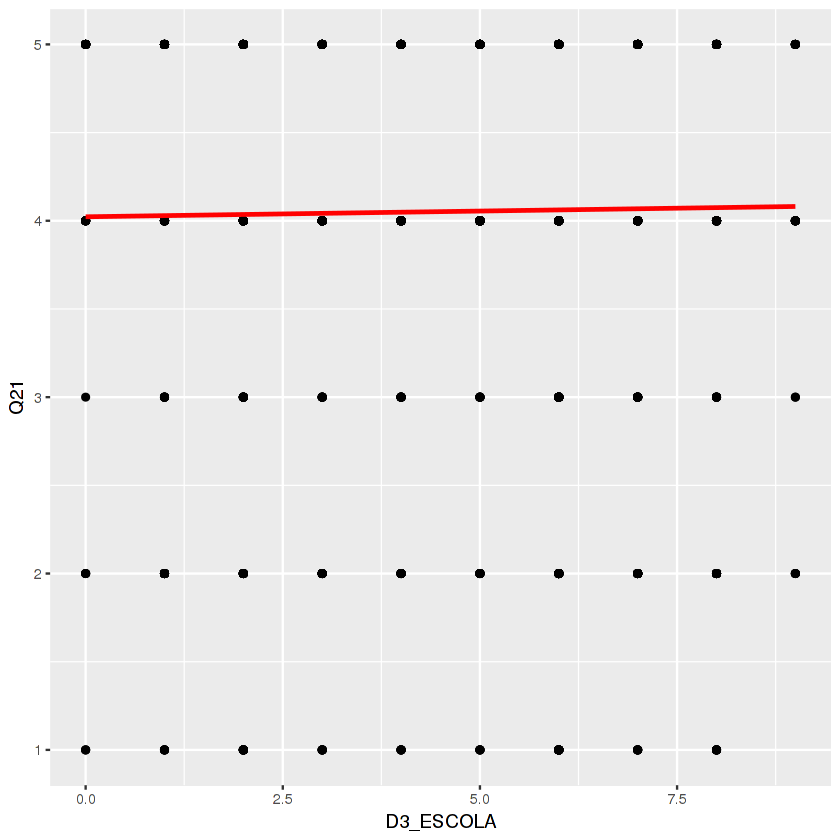

In [40]:
analspear <-cor.test(dfspear$D3_ESCOLA, dfspear$Q21,  method = "spearman")
analspear

ggplot(dfspear, aes(x=D3_ESCOLA, y=Q21)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=FALSE)

#### 3.2 "Conservadorismo" e confiança nas forças armadas

Warning message in cor.test.default(dfspear$Q501, dfspear$P309, method = "spearman"):
“Cannot compute exact p-value with ties”


	Spearman's rank correlation rho

data:  dfspear$Q501 and dfspear$P309
S = 1639300000, p-value = 3.277e-08
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1166067 


Don't know how to automatically pick scale for object of type labelled. Defaulting to continuous.
Don't know how to automatically pick scale for object of type labelled. Defaulting to continuous.


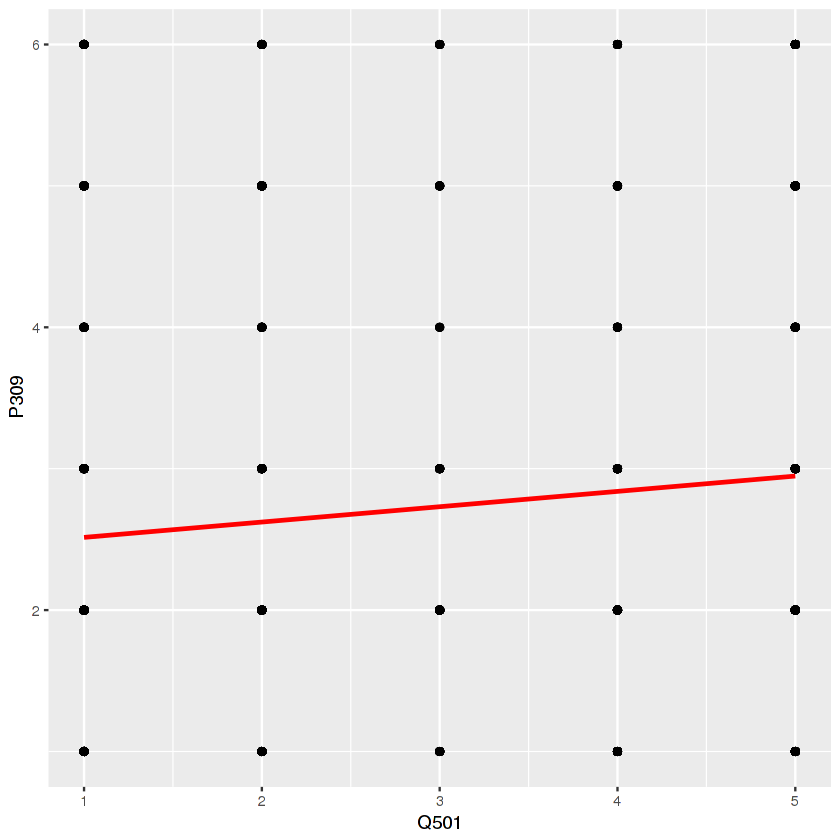

In [39]:
analspear <-cor.test(dfspear$Q501, dfspear$P309,  method = "spearman")
analspear

ggplot(dfspear, aes(x=Q501, y=P309)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=FALSE)